# Schimpfwörter #

Hypothese:
Schimpfwörter werden fehlinterpretiert wenn sie durch Sonderzeichen verschleiert werden.

Grund: Statische Analyse

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')
import csv
import re

In [23]:
#Swear_Word_Deutsch.csv
ger_swear_words = []
with open('../data/Swear_Word_Deutsch.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ger_swear_words.append(row['Swear Word'])
# als Teilwort
def all(c):
    return True
def last_is_swearword(element):
    for ger_swear_word in ger_swear_words:
        if len(element['tokens'])>3 and (element['tokens'][-1].text.lower() == ger_swear_word.lower() or element['tokens'][-2].text.lower() == ger_swear_word.lower() or element['tokens'][-3].text.lower() == ger_swear_word.lower()):
            return True
    return False
                
def contains_no_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0:
            return False
    return True
def contains_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0 and len(ger_swear_word) > 3:
            return True
    return False

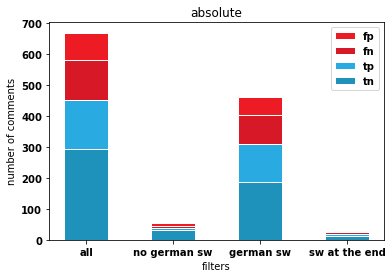

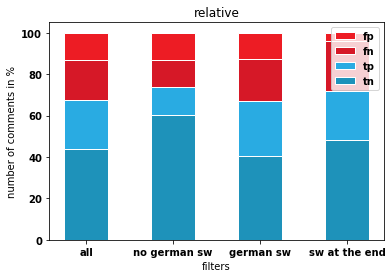

In [24]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('no german sw',contains_no_swear_word))
diagram_filters.append(('german sw',contains_swear_word))
diagram_filters.append(('sw at the end',last_is_swearword))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [25]:
print('all')
show_metrics(calc_metrics())
print('last is swearword')
metric = calc_metrics(last_is_swearword)
show_metrics(metric)

print('last is swearword difference')
show_metrics(calc_metric_difference(metric))

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


last is swearword


,label hate (12),label nohate (13)
pred hate (7),6,1
pred nohate (18),6,12


accuracy,precision,recall,f1_score
0.72,0.8571428571428571,0.5,0.631578947368421


last is swearword difference


,label hate (287),label nohate (383)
pred hate (250),163,87
pred nohate (420),124,296


accuracy,precision,recall,f1_score
0.6850746268656717,0.652,0.5679442508710801,0.6070763500931098
